In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer.data
y = cancer.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [5]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": [1,9],
              "min_samples_leaf": [1,9],
              "criterion": ["gini", "entropy"]}
# Instantiate the classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier() 

In [11]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Parameter setting that gave the best results on the hold out data. i.e. Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Mean cross-validated score of the best_estimator.i.e.Best score is {}".format(tree_cv.best_score_))

Parameter setting that gave the best results on the hold out data. i.e. Tuned Decision Tree Parameters: {'min_samples_leaf': 9, 'max_features': 9, 'max_depth': None, 'criterion': 'entropy'}
Mean cross-validated score of the best_estimator.i.e.Best score is 0.9422572178477691


In [7]:
# predict on X_test
y_pred = tree_cv.predict(X_test)

In [8]:
#Generate y-y'

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 63   4]
 [  4 117]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



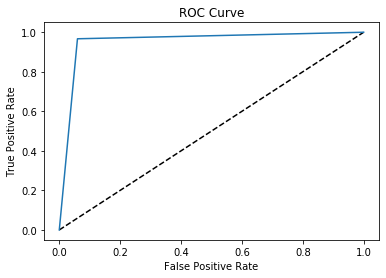

In [9]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [10]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred)))

AUC: 0.9536203281115087
